In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import statistics as stats

# Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


# Attribute Information:

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Reading the txt file with the seperator  ';'

In [2]:
data = pd.read_csv('household_power_consumption/household_power_consumption.txt',sep=';')
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


### Creating a sample of 15000 random data points

In [3]:
data_sample = data.sample(15000)

### Looking for missing values

<AxesSubplot:>

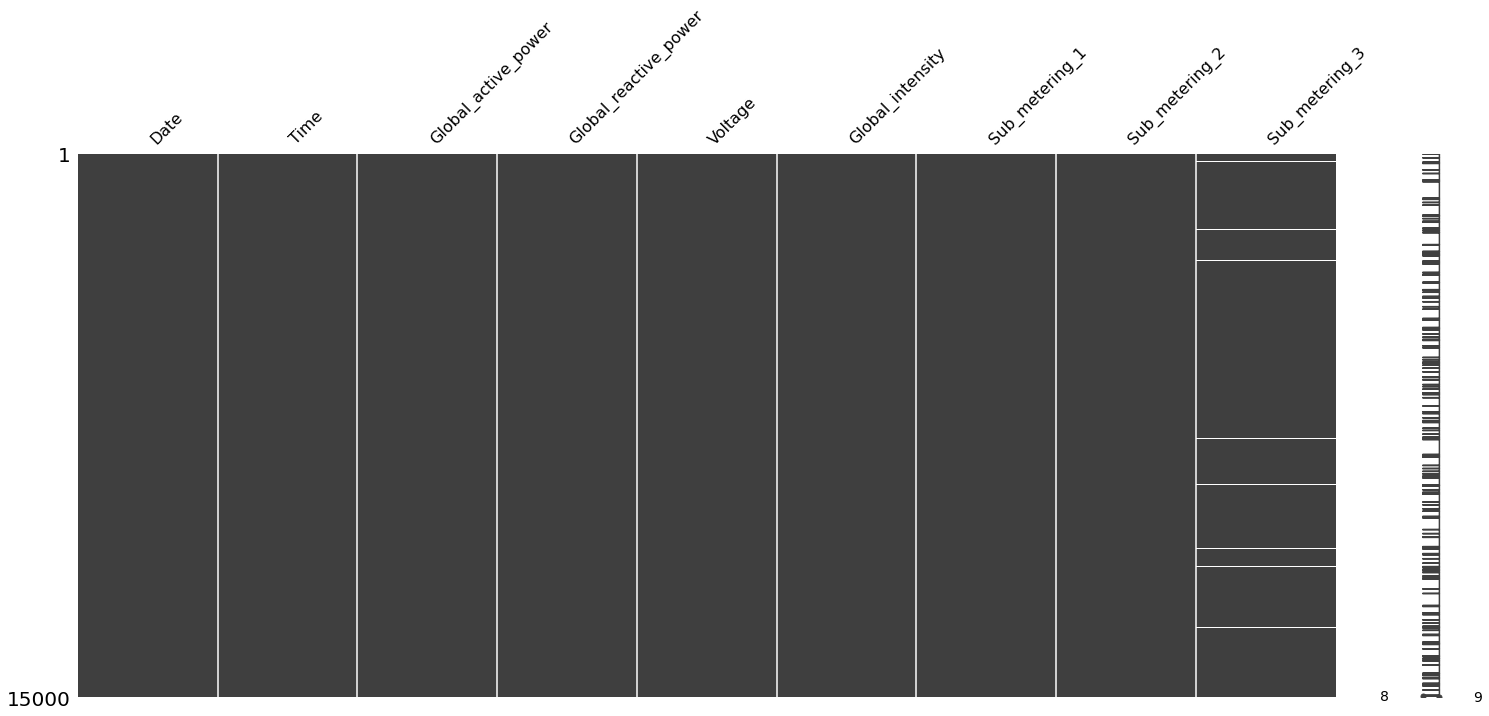

In [4]:
msno.matrix(data_sample)

In [5]:
data_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           175
dtype: int64

In [6]:
data_sample.isna().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           175
dtype: int64

In [7]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1222794 to 1444821
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   15000 non-null  object 
 1   Time                   15000 non-null  object 
 2   Global_active_power    15000 non-null  object 
 3   Global_reactive_power  15000 non-null  object 
 4   Voltage                15000 non-null  object 
 5   Global_intensity       15000 non-null  object 
 6   Sub_metering_1         15000 non-null  object 
 7   Sub_metering_2         15000 non-null  object 
 8   Sub_metering_3         14825 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


OMG!!! only one column is numerical, others are objects!!!
### Changing the datatype

In [8]:
data_sample.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
data_sample.replace("?",np.nan,inplace=True)

In [10]:
data_sample1 = data_sample.astype({'Global_active_power':'float', 'Global_reactive_power':'float',
       'Voltage':'float', 'Global_intensity':'float', 'Sub_metering_1':'float', 'Sub_metering_2':'float'})

In [11]:
data_sample1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1222794 to 1444821
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   15000 non-null  object 
 1   Time                   15000 non-null  object 
 2   Global_active_power    14825 non-null  float64
 3   Global_reactive_power  14825 non-null  float64
 4   Voltage                14825 non-null  float64
 5   Global_intensity       14825 non-null  float64
 6   Sub_metering_1         14825 non-null  float64
 7   Sub_metering_2         14825 non-null  float64
 8   Sub_metering_3         14825 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.1+ MB


### Createing a new date_time column

In [12]:
data_sample1['date_time'] = pd.to_datetime(data_sample1['Date']+" "+data_sample1['Time'])

In [13]:
data_sample1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
1222794,13/4/2009,21:18:00,3.322,0.204,238.70,14.2,1.0,33.0,1.0,2009-04-13 21:18:00
745115,17/5/2008,03:59:00,0.328,0.232,241.38,1.6,0.0,0.0,1.0,2008-05-17 03:59:00
55217,24/1/2007,01:41:00,0.298,0.112,245.59,1.2,0.0,0.0,0.0,2007-01-24 01:41:00
890260,25/8/2008,23:04:00,0.082,0.000,241.01,0.2,0.0,0.0,1.0,2008-08-25 23:04:00
1054760,18/12/2008,04:44:00,0.336,0.078,245.62,1.4,0.0,1.0,0.0,2008-12-18 04:44:00


### Combining sub meterings

In [14]:
data_sample1['meterings'] = data_sample1['Sub_metering_1'] + data_sample1['Sub_metering_2'] + data_sample1['Sub_metering_3']

In [15]:
data_sample1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,meterings
1222794,13/4/2009,21:18:00,3.322,0.204,238.70,14.2,1.0,33.0,1.0,2009-04-13 21:18:00,35.0
745115,17/5/2008,03:59:00,0.328,0.232,241.38,1.6,0.0,0.0,1.0,2008-05-17 03:59:00,1.0
55217,24/1/2007,01:41:00,0.298,0.112,245.59,1.2,0.0,0.0,0.0,2007-01-24 01:41:00,0.0
890260,25/8/2008,23:04:00,0.082,0.000,241.01,0.2,0.0,0.0,1.0,2008-08-25 23:04:00,1.0
1054760,18/12/2008,04:44:00,0.336,0.078,245.62,1.4,0.0,1.0,0.0,2008-12-18 04:44:00,1.0


### Dropping unecessary cols

In [16]:
data_sample1.drop(columns=['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [17]:
data_sample1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
1222794,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
745115,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
55217,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
890260,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
1054760,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


now we are good for doing an EDA but first lets see at the missing data and outliers
### again looking at the missing data

<AxesSubplot:>

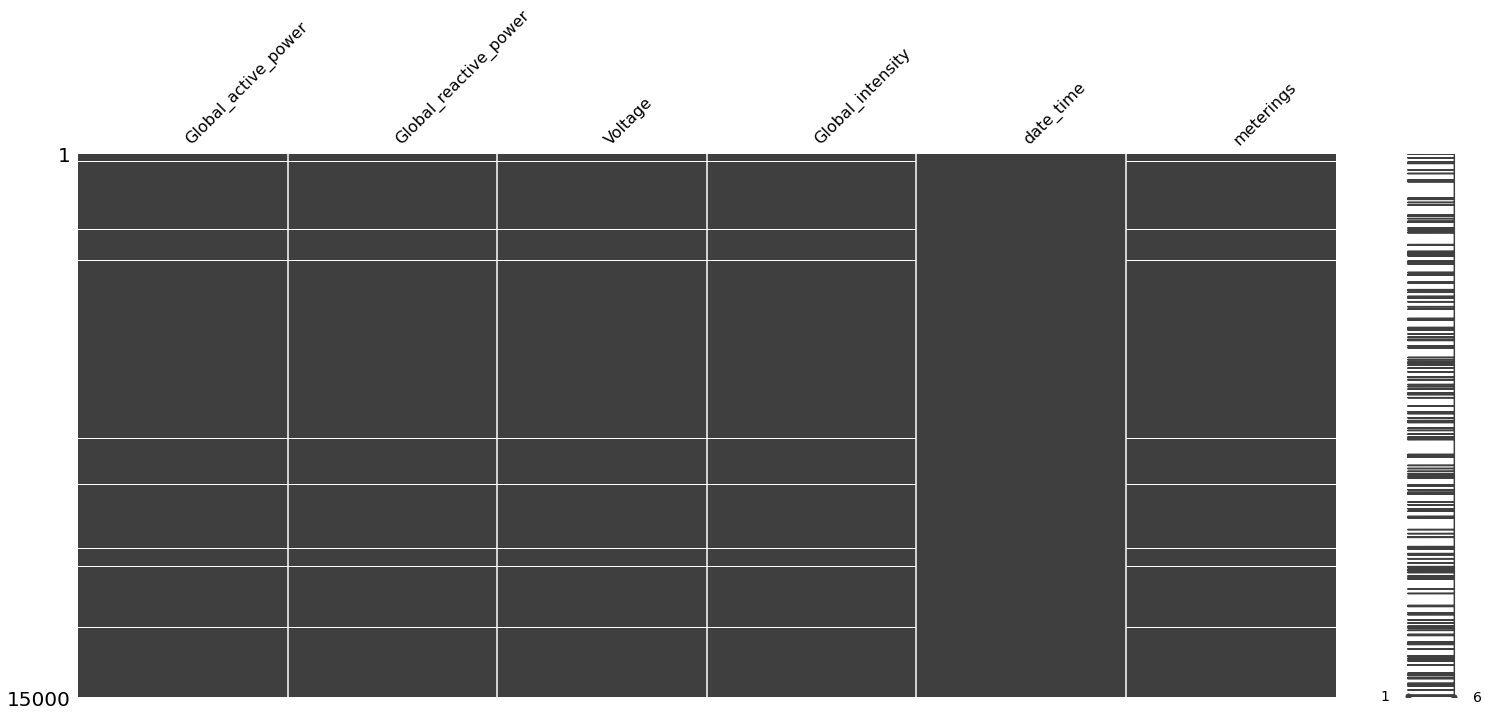

In [18]:
msno.matrix(data_sample1)

In [19]:
data_sample1.isnull().sum()

Global_active_power      175
Global_reactive_power    175
Voltage                  175
Global_intensity         175
date_time                  0
meterings                175
dtype: int64

In [20]:
data_sample1.isna().sum()

Global_active_power      175
Global_reactive_power    175
Voltage                  175
Global_intensity         175
date_time                  0
meterings                175
dtype: int64

Since we have the same amount of missing value in each column, we have to drop the values.

In [21]:
data_sample1.reset_index(inplace=True)

In [22]:
data_sample1.dropna(inplace=True)

In [23]:
data_sample1.columns

Index(['index', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'date_time', 'meterings'],
      dtype='object')

In [24]:
data_sample1.drop(columns=['index'],axis=1,inplace=True)

In [25]:
data_sample1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Global_active_power    14825 non-null  float64       
 1   Global_reactive_power  14825 non-null  float64       
 2   Voltage                14825 non-null  float64       
 3   Global_intensity       14825 non-null  float64       
 4   date_time              14825 non-null  datetime64[ns]
 5   meterings              14825 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 810.7 KB


In [26]:
data_sample1.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
date_time                0
meterings                0
dtype: int64

<AxesSubplot:>

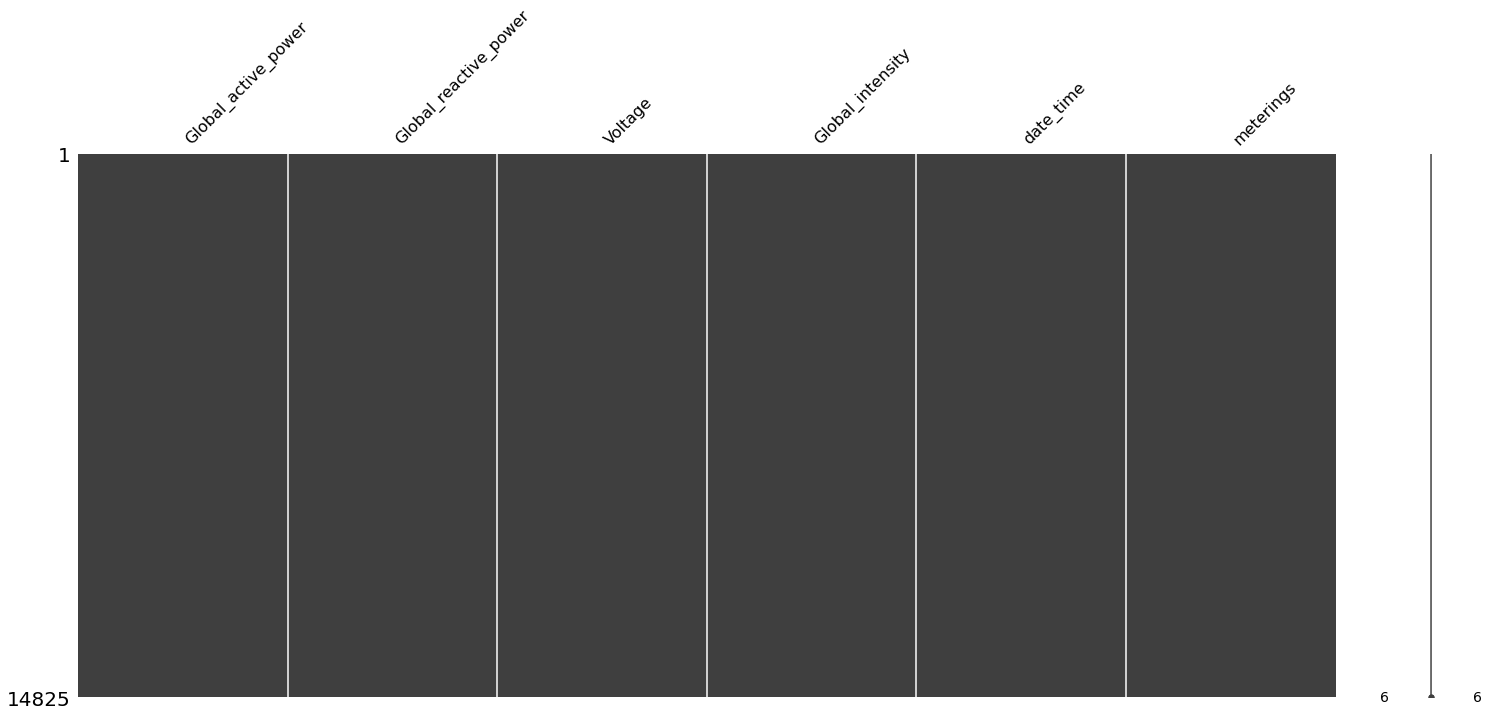

In [27]:
msno.matrix(data_sample1)

In [ ]:
np.bf

Now we do not have any null data left.\
lets export this cleaned data to a new csv file.
### exporting csv

In [42]:
import os
os.makedirs('no_missing_values')
data_sample1.to_csv('no_missing_values/sample_pow_cons.csv')